In [1]:
from google.colab import files 
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [8]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor,KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
# warning library 
import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv('/content/dataset.csv')

In [10]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

In [12]:
data.shape

(569, 32)

In [13]:
# Statisctical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [14]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64


Observations:

    There are a total of 569 records and 33 features in the dataset.
    Each feature can be integer, float or object datatype.
    There are zero NaN values in the dataset.
    In the outcome column, M represents malignant cancer and B represents benign cancer.



# **Data Preprocessing**

In [15]:
data.drop(['id'],inplace=True,axis=1)
data=data.rename(columns = {"diagnosis":"target"})

B    357
M    212
Name: target, dtype: int64


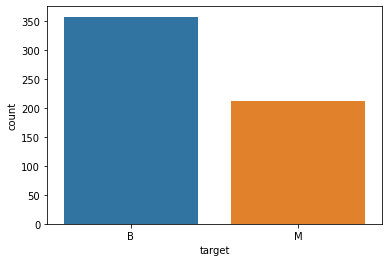

In [16]:
# Data count plot
sns.countplot(data["target"])
print(data.target.value_counts())

In [17]:
# Target feature change to as 0 and 1
data["target"]=[1 if i.strip()=="M" else 0 for i in data.target] 

**Exploratory Data Analysis**

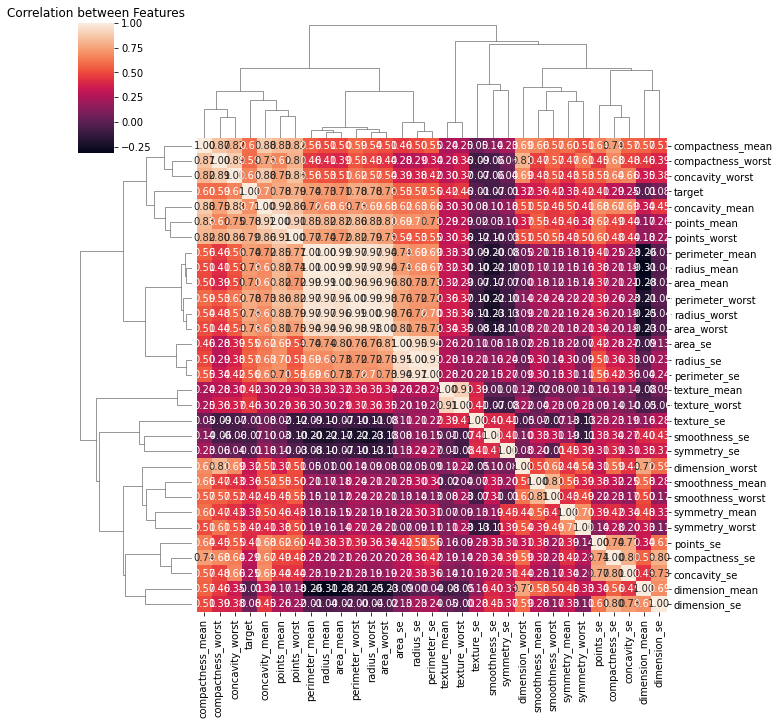

In [18]:
# Correlation
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot=True, fmt= ".2f")
plt.title("Correlation between Features")
plt.show()

Text(0.5, 1.0, 'Correlation Between Features with Corr Threshold 0.75')

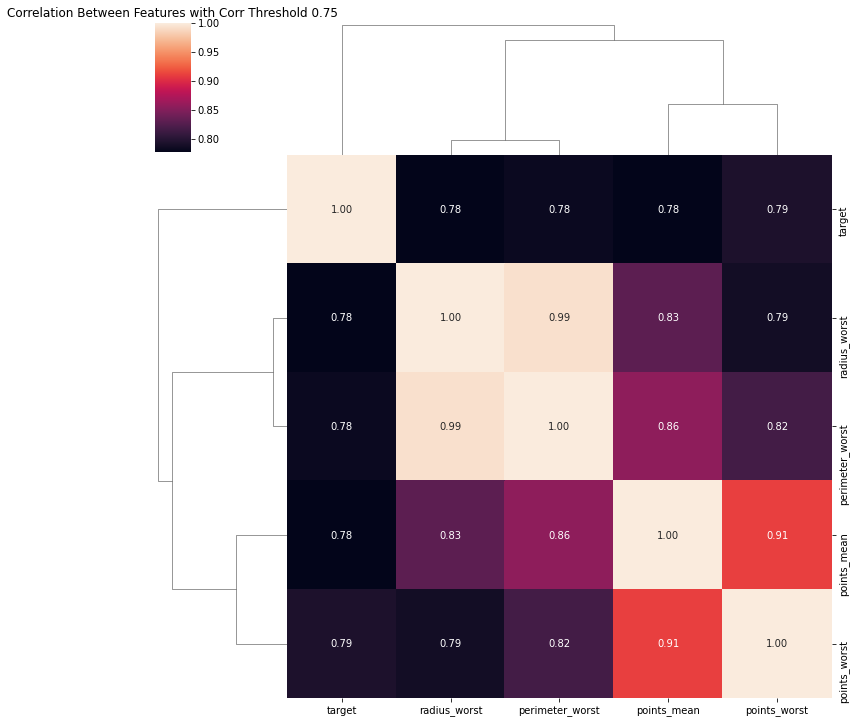

In [19]:
# Correllation with threshold 0.75
threshold = 0.75
filt = np.abs(corr_matrix['target'])>threshold
corr_features = corr_matrix.columns[filt].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Corr Threshold 0.75")

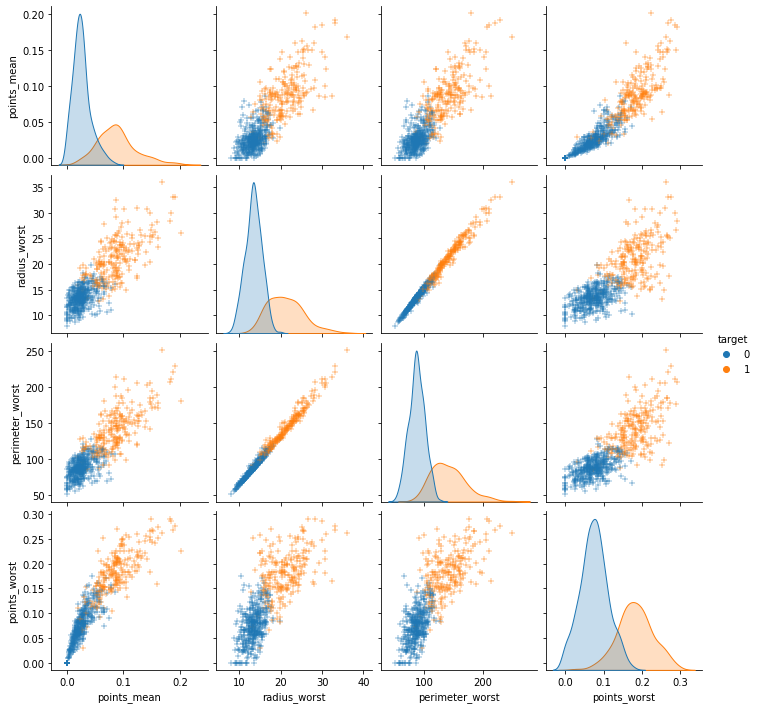

In [20]:
# Pair plot
sns.pairplot(data[corr_features],diag_kind="kde", markers = "+", hue="target")
plt.show()

Target and Feature Variables

In [21]:
y = data['target'].values  # Target variable
X = data.drop('target',axis=1).values # Feature variables

Spliting data into train and test sets

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

**Data Normalization**

In [24]:
# Normalization
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression 
#Model building
model = LogisticRegression(max_iter=1000)

#Tuning parameters
parameters = {'C':[0.001,0.01, 0.1, 0.2,0.3,1,10,100,200]}
grid_search = GridSearchCV(model, parameters, cv = 10) # 10 Fold Cross Validation

# Model fitting
grid_search.fit(X_train_sc, y_train)


print("Best Score is ", grid_search.best_score_)
print("Best Estimator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9845893719806764
Best Estimator is  LogisticRegression(C=1, max_iter=1000)
Best Parametes are {'C': 1}


In [30]:
#After hyperparameter tuning
model = LogisticRegression(C = 1,max_iter=1000)
model.fit(X_train_sc, y_train)
y_pred_lr = model.predict(X_test_sc)
accuracy_lr = accuracy_score(y_test,y_pred_lr)
print("Accuracy on Test Data:",accuracy_lr)

Accuracy on Test Data: 0.9210526315789473


In [31]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        77
           1       0.85      0.92      0.88        37

    accuracy                           0.92       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



Confusion Matrix

In [32]:
confusion_matrix(y_test,y_pred_lr)
lr_cm = confusion_matrix(y_test, y_pred_lr)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,71,6
Malignant,3,34


# Decision Tree

In [33]:
#model building
model = DecisionTreeClassifier()

# Tunning Paramaters
parameters = {'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
              'max_features': ['auto', 'sqrt', 'log2']}


# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10) # For 10 Cross-Validation

grid_search.fit(X_train_sc, y_train) # Model Fitting
print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9584057971014494
Best Estinator is  DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=3)
Best Parametes are {'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3}


In [35]:
#After hyperparameter tuning
model = DecisionTreeClassifier(max_features = 'sqrt', min_samples_leaf=3, min_samples_split=3)
model.fit(X_train_sc, y_train)
y_pred_dt = model.predict(X_test_sc)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print("Accuracy on Test Data:",accuracy_dt)

Accuracy on Test Data: 0.9385964912280702


Classification report

In [36]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.89      0.92      0.91        37

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



Confusion Matrix

In [37]:
confusion_matrix(y_test,y_pred_dt)
lr_cm = confusion_matrix(y_test, y_pred_dt)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,73,4
Malignant,3,34


# K-Nearest Neighbours (KNN)

In [38]:
#model building
model = KNeighborsClassifier()

# Tunning Paramaters
parameters = {'n_neighbors': list(range(1, 30)),
              'leaf_size': list(range(1,30)),
              'weights': [ 'distance', 'uniform']} 

# GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=10) 
grid_search.fit(X_train_sc, y_train) 

print("Best Score is ", grid_search.best_score_)
print("Best Estinator is ", grid_search.best_estimator_)
print("Best Parametes are", grid_search.best_params_)

Best Score is  0.9737681159420291
Best Estinator is  KNeighborsClassifier(leaf_size=1, n_neighbors=3, weights='distance')
Best Parametes are {'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}


In [39]:
#After hyperparameter tuning
model = KNeighborsClassifier(leaf_size =1, n_neighbors =  3, weights = 'distance')
model.fit(X_train_sc, y_train)
y_pred_knn = model.predict(X_test_sc)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy on Test Data:",accuracy_knn)

Accuracy on Test Data: 0.9298245614035088


Classification report

In [40]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        77
           1       0.91      0.86      0.89        37

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



Confusion matrix

In [41]:
confusion_matrix(y_test,y_pred_knn)
lr_cm = confusion_matrix(y_test, y_pred_knn)
lr_cm = pd.DataFrame(lr_cm, columns=['Benign', 'Malignant'], index=['Benign','Malignant'])
lr_cm

,Benign,Malignant
Benign,74,3
Malignant,5,32


The accuracies obtained by the above algorithms are as follows:

1.   Logistic Regression- 92.10%
2.   **Decision Tree Algorithm- 94.73%**
3.   K - Nearest Neighbour-  92.98%

